In [81]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("credit_card_churn.csv")
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0                  39  ...                      3       12691.0   
1                  44  ...                      2        8256.0   
2                  36  ...                      0        3418.0   
3                  34  ...                      1        3313.0   
4                  21  ...                      0        4716.0   
...               ...  ...                    ...           ...   
10122              40  ...                      3        4003.0   
10123              25  ...                      3        4277.0   
10124              36  ...                      4        5409.0   
10125              36  ...                      3        5281.0   
10126              25  ...                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777          11914.0                 1.335   
1                      864           7392.0                 1.541   
2                        0           3418.0                 2.594   
3                     2517            796.0                 1.405   
4                        0           4716.0                 2.175   
...                    ...              ...                   ...   
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...                  ...   
10122            15476             117                0.857   
10123             8764              69                0.683   
10124            10291              60  

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
df.replace({"Unknown":np.nan}, inplace = True)

In [7]:
df.isna().mean()*100

CLIENTNUM                     0.000000
Attrition_Flag                0.000000
Customer_Age                  0.000000
Gender                        0.000000
Dependent_count               0.000000
Education_Level              14.999506
Marital_Status                7.396070
Income_Category              10.980547
Card_Category                 0.000000
Months_on_book                0.000000
Total_Relationship_Count      0.000000
Months_Inactive_12_mon        0.000000
Contacts_Count_12_mon         0.000000
Credit_Limit                  0.000000
Total_Revolving_Bal           0.000000
Avg_Open_To_Buy               0.000000
Total_Amt_Chng_Q4_Q1          0.000000
Total_Trans_Amt               0.000000
Total_Trans_Ct                0.000000
Total_Ct_Chng_Q4_Q1           0.000000
Avg_Utilization_Ratio         0.000000
Unnamed: 21                 100.000000
dtype: float64

# EDA (Exploratory Data Analysis)  Feature engineering

## 0. CLIENTNUM

In [55]:
df["CLIENTNUM"].nunique() ## All values are unique and the feature is not usable so drop the feature columns

10127

In [92]:
df.drop("Unnamed: 21", axis = 1, inplace = True)

In [8]:
df.shape

(10127, 22)

In [9]:
df.drop("CLIENTNUM", axis = 1 , inplace = True)     ## Drop column

## 1. Attrition_Flag

In [10]:
df["Attrition_Flag"].nunique()

2

In [11]:
df["Attrition_Flag"].value_counts().to_dict()

{'Existing Customer': 8500, 'Attrited Customer': 1627}

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


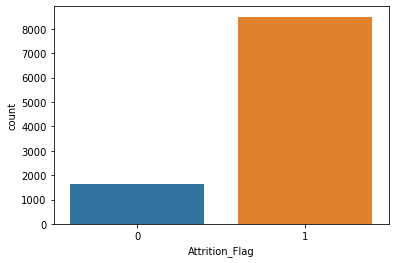

In [24]:
sns.countplot(df["Attrition_Flag"])  ##unbalance data
plt.savefig("class.png")

In [74]:
1627/10127

0.1606596227905599

In [25]:
df["Attrition_Flag"].replace({'Existing Customer': 1, 'Attrited Customer': 0},inplace = True)

## 2. Customer_Age

In [26]:
df["Customer_Age"].nunique()

45

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_Age'>

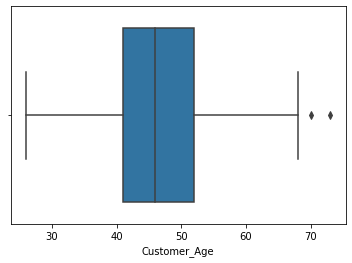

In [27]:
sns.boxplot(df["Customer_Age"])

## 3.Gender 

In [28]:
df["Gender"].nunique()

2

In [29]:
df["Gender"].value_counts().to_dict()

{'F': 5358, 'M': 4769}

In [79]:
df["Gender"].replace({'F': 1, 'M': 0}, inplace = True)

## 4. Dependent_count

In [31]:
df["Dependent_count"].nunique()

6

In [32]:
df["Dependent_count"].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

## 5. Education_Level

In [33]:
df["Education_Level"].nunique()

6

In [34]:
df["Education_Level"].value_counts().to_dict()

{'Graduate': 3128,
 'High School': 2013,
 'Uneducated': 1487,
 'College': 1013,
 'Post-Graduate': 516,
 'Doctorate': 451}

In [35]:
df["Education_Level"].replace({'Graduate': 3,
 'High School': 1,
 'Uneducated': 0,
 'College': 2,
 'Post-Graduate': 4,
 'Doctorate': 5}, inplace = True)

## 6. Marital_Status

In [36]:
df["Marital_Status"].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [37]:
df["Marital_Status"].isna().sum()

749

In [38]:
df["Marital_Status"] = df["Marital_Status"].fillna("Married")

In [77]:
df = pd.get_dummies(df,columns=['Marital_Status'])
df

Attrition_Flag  Customer_Age Gender  Dependent_count  Education_Level  \
0                   1            45      M                3              1.0   
1                   1            49      F                5              3.0   
2                   1            51      M                3              3.0   
3                   1            40      F                4              1.0   
4                   1            40      M                3              0.0   
...               ...           ...    ...              ...              ...   
10122               1            50      M                2              3.0   
10123               0            41      M                2              NaN   
10124               0            44      F                1              1.0   
10125               0            30      M                2              3.0   
10126               0            43      F                2              3.0   

       Income_Category  Card_Category  Months_on_book  \
0                  3.0              0              39   
1                  0.0              0              44   
2                  2.0              0              36   
3                  0.0              0              34   
4                  3.0              0              21   
...                ...            ...             ...   
10122              1.0              0              40   
10123              1.0              0              25   
10124              0.0              0              36   
10125              1.0              0              36   
10126              0.0              1              25   

       Total_Relationship_Count  Months_Inactive_12_mon  ...  Avg_Open_To_Buy  \
0                             5                       1  ...          11914.0   
1                             6                       1  ...           7392.0   
2                             4                       1  ...           3418.0   
3                             3                       4  ...            796.0   
4                             5                       1  ...           4716.0   
...                         ...                     ...  ...              ...   
10122                         3                       2  ...           2152.0   
10123                         4                       2  ...           2091.0   
10124                         5                       3  ...           5409.0   
10125                         4                       3  ...           5281.0   
10126                         6                       2  ...           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Unnamed: 21  \
0                    1.625                  0.061          NaN   
1                    3.714                  0.105          NaN   
2                    2.333                  0.000          NaN   
3                    2.333                  0.760          NaN   
4                    2.500                  0.000          NaN   
...                    ...                    ...          ...   
10122                0.857                  0.462          NaN   
10123                0.683                  0.511          NaN   
10124                0.81

## 7. Income_Category

In [74]:
df["Income_Category"].value_counts().to_dict()  

{'Less than $40K': 3561,
 '$40K - $60K': 1790,
 '$80K - $120K': 1535,
 '$60K - $80K': 1402,
 '$120K +': 727}

In [76]:
df["Income_Category"].replace({'Less than $40K': 0,
 '$40K - $60K': 1,
 '$80K - $120K': 2,
 '$60K - $80K': 3,
 '$120K +': 4}, inplace = True)

## 8. Card_Category

In [72]:
df["Card_Category"].value_counts().to_dict()

{'Blue': 9436, 'Silver': 555, 'Gold': 116, 'Platinum': 20}

In [73]:
df["Card_Category"].replace({'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}, inplace  = True)

## 9. Months_on_book

In [41]:
df["Months_on_book"].nunique()

44

In [42]:
df["Months_on_book"].unique()

array([39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 37, 56, 42, 49, 33, 28,
       38, 41, 43, 45, 52, 40, 50, 35, 47, 32, 20, 29, 25, 53, 24, 55, 23,
       22, 26, 13, 51, 19, 15, 17, 18, 16, 14], dtype=int64)

## 10. Total_Relationship_Count

In [43]:
df["Total_Relationship_Count"].nunique()

6

In [44]:
df["Total_Relationship_Count"].unique()

array([5, 6, 4, 3, 2, 1], dtype=int64)

## 11. Months_Inactive_12_mon

In [45]:
df["Months_Inactive_12_mon"].nunique()

7

In [46]:
df["Months_Inactive_12_mon"].unique()

array([1, 4, 2, 3, 6, 0, 5], dtype=int64)

## 12. Contacts_Count_12_mon

In [47]:
df["Contacts_Count_12_mon"].nunique()

7

In [48]:
df["Contacts_Count_12_mon"].unique()

array([3, 2, 0, 1, 4, 5, 6], dtype=int64)

## 13.Credit_Limit

In [49]:
df["Credit_Limit"].nunique()

6205

In [50]:
df["Credit_Limit"].unique()

array([12691.,  8256.,  3418., ...,  5409.,  5281., 10388.])

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Limit'>

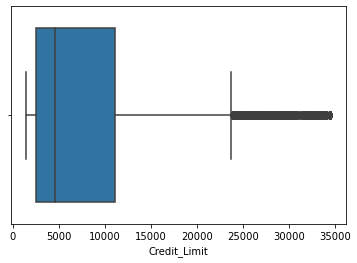

In [29]:
sns.boxplot(df["Credit_Limit"])

## 14. Total_Revolving_Bal

In [51]:
df["Total_Revolving_Bal"].nunique()

1974

In [52]:
df["Total_Revolving_Bal"]

0         777
1         864
2           0
3        2517
4           0
         ... 
10122    1851
10123    2186
10124       0
10125       0
10126    1961
Name: Total_Revolving_Bal, Length: 10127, dtype: int64

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Revolving_Bal'>

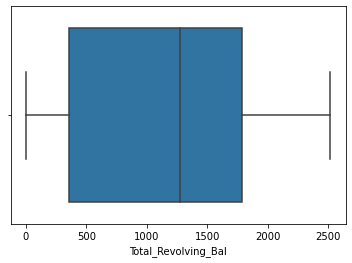

In [53]:
sns.boxplot(df["Total_Revolving_Bal"])

## 15.Avg_Open_To_Buy

In [54]:
df["Avg_Open_To_Buy"].nunique()

6813

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_Open_To_Buy'>

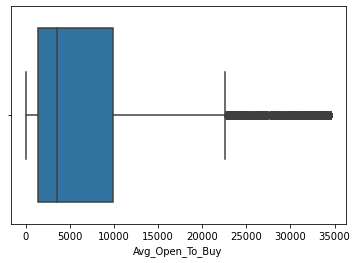

In [56]:
sns.boxplot(df["Avg_Open_To_Buy"])

## 16. Total_Amt_Chng_Q4_Q1

In [57]:
df["Total_Amt_Chng_Q4_Q1"]

0        1.335
1        1.541
2        2.594
3        1.405
4        2.175
         ...  
10122    0.703
10123    0.804
10124    0.819
10125    0.535
10126    0.703
Name: Total_Amt_Chng_Q4_Q1, Length: 10127, dtype: float64

In [58]:
df["Total_Amt_Chng_Q4_Q1"].nunique()

1158

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1'>

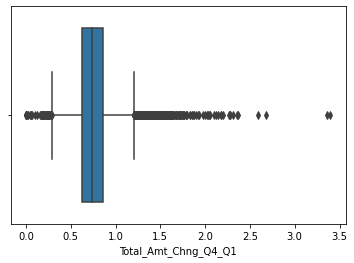

In [59]:
sns.boxplot(df["Total_Amt_Chng_Q4_Q1"])

## 17.Total_Trans_Amt

In [62]:
df["Total_Trans_Amt"].nunique()

5033

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Trans_Amt'>

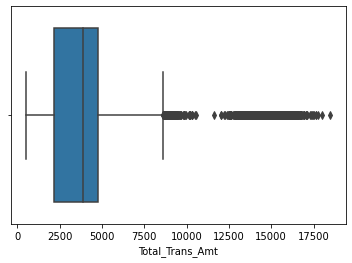

In [63]:
sns.boxplot(df["Total_Trans_Amt"])

## 18. Total_Trans_Ct

In [64]:
df["Total_Trans_Ct"].nunique()

126

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Trans_Ct'>

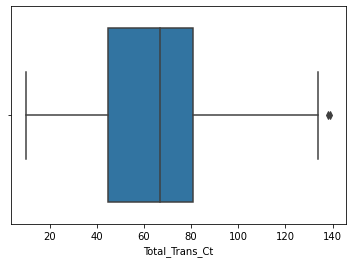

In [65]:
sns.boxplot(df["Total_Trans_Ct"])

## 19. Total_Ct_Chng_Q4_Q1

In [66]:
df["Total_Ct_Chng_Q4_Q1"].nunique()

830

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1'>

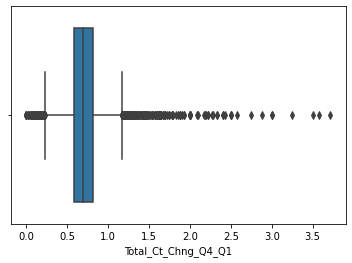

In [67]:
sns.boxplot(df["Total_Ct_Chng_Q4_Q1"])

## 20. Avg_Utilization_Ratio

In [68]:
df["Avg_Utilization_Ratio"].nunique()

964

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_Utilization_Ratio'>

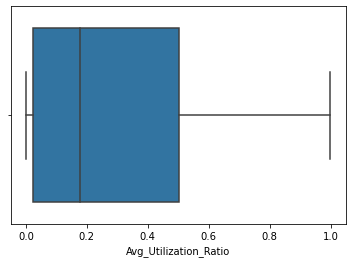

In [69]:
sns.boxplot(df["Avg_Utilization_Ratio"])

# Feature Engineering

In [70]:
x = df.isna().mean()*100
x

Attrition_Flag                0.000000
Customer_Age                  0.000000
Gender                        0.000000
Dependent_count               0.000000
Education_Level              14.999506
Marital_Status                0.000000
Income_Category              10.980547
Card_Category                 0.000000
Months_on_book                0.000000
Total_Relationship_Count      0.000000
Months_Inactive_12_mon        0.000000
Contacts_Count_12_mon         0.000000
Credit_Limit                  0.000000
Total_Revolving_Bal           0.000000
Avg_Open_To_Buy               0.000000
Total_Amt_Chng_Q4_Q1          0.000000
Total_Trans_Amt               0.000000
Total_Trans_Ct                0.000000
Total_Ct_Chng_Q4_Q1           0.000000
Avg_Utilization_Ratio         0.000000
Unnamed: 21                 100.000000
dtype: float64

## Fill missing values by knn imputer 


In [90]:
imputer = KNNImputer()
array = imputer.fit_transform(df)

In [93]:
df_new = pd.DataFrame(array,columns = df.columns)
df_new

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                 1.0          45.0     0.0              3.0              1.0   
1                 1.0          49.0     1.0              5.0              3.0   
2                 1.0          51.0     0.0              3.0              3.0   
3                 1.0          40.0     1.0              4.0              1.0   
4                 1.0          40.0     0.0              3.0              0.0   
...               ...           ...     ...              ...              ...   
10122             1.0          50.0     0.0              2.0              3.0   
10123             0.0          41.0     0.0              2.0              2.6   
10124             0.0          44.0     1.0              1.0              1.0   
10125             0.0          30.0     0.0              2.0              3.0   
10126             0.0          43.0     1.0              2.0              3.0   

       Income_Category  Card_Category  Months_on_book  \
0                  3.0            0.0            39.0   
1                  0.0            0.0            44.0   
2                  2.0            0.0            36.0   
3                  0.0            0.0            34.0   
4                  3.0            0.0            21.0   
...                ...            ...             ...   
10122              1.0            0.0            40.0   
10123              1.0            0.0            25.0   
10124              0.0            0.0            36.0   
10125              1.0            0.0            36.0   
10126              0.0            1.0            25.0   

       Total_Relationship_Count  Months_Inactive_12_mon  ...  \
0                           5.0                     1.0  ...   
1                           6.0                     1.0  ...   
2                           4.0                     1.0  ...   
3                           3.0                     4.0  ...   
4                           5.0                     1.0  ...   
...                         ...                     ...  ...   
10122                       3.0                     2.0  ...   
10123                       4.0                     2.0  ...   
10124                       5.0                     3.0  ...   
10125                       4.0                     3.0  ...   
10126                       6.0                     2.0  ...   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                    777.0          11914.0                 1.335   
1                    864.0           7392.0                 1.541   
2                      0.0           3418.0                 2.594   
3                   2517.0            796.0                 1.405   
4                      0.0           4716.0                 2.175   
...                    ...              ...                   ...   
10122               1851.0           2152.0                 0.703   
10123               2186.0           2091.0                 0.804   
10124                  0.0           5409.0                 0.819   
10125                  0.0           5281.0                 0.535   
10126               1961.0           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0               1144.0            42.0                1.625   
1               1291.0            33.0                3.714   
2               1887.0            20.0                2.333   
3               1171.0            20.0                2.333   
4                816.0            28.0                2.500   
...                ...             ...                  ...   
10122          15476.0           117.0                0.857   
10123           8764.0            69.0                0.683   
10124          10291.0            60.0                0.818   
10125           8395.0            62.0                0.722   
10126          10294.0            61.0                0.64

In [94]:
df_new.isna().mean()*100

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
Marital_Status_Divorced     0.0
Marital_Status_Married      0.0
Marital_Status_Single       0.0
dtype: float64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   float64
 5   Income_Category           9015 non-null   float64
 6   Card_Category             10127 non-null  int64  
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

# Feature Selection

In [118]:
df_new.corr()    

Attrition_Flag  Customer_Age    Gender  \
Attrition_Flag                  1.000000     -0.018203 -0.037272   
Customer_Age                   -0.018203      1.000000  0.017312   
Gender                         -0.037272      0.017312  1.000000   
Dependent_count                -0.018991     -0.122254 -0.004563   
Education_Level                -0.021871      0.003515  0.007302   
Income_Category                 0.020438      0.018640 -0.704212   
Card_Category                  -0.002354     -0.018235 -0.080093   
Months_on_book                 -0.013687      0.788912  0.006728   
Total_Relationship_Count        0.150005     -0.010931 -0.003157   
Months_Inactive_12_mon         -0.152449      0.054361  0.011163   
Contacts_Count_12_mon          -0.204491     -0.018452 -0.039987   
Credit_Limit                    0.023873      0.002476 -0.420806   
Total_Revolving_Bal             0.263053      0.014780 -0.029658   
Avg_Open_To_Buy                 0.000285      0.001151 -0.418059   
Total_Amt_Chng_Q4_Q1            0.131063     -0.062042 -0.026712   
Total_Trans_Amt                 0.168598     -0.046446 -0.024890   
Total_Trans_Ct                  0.371403     -0.067097  0.067454   
Total_Ct_Chng_Q4_Q1             0.290054     -0.012143  0.005800   
Avg_Utilization_Ratio           0.178410      0.007114  0.257851   
Marital_Status_Divorced        -0.000850     -0.042614  0.004726   
Marital_Status_Married          0.019061      0.033351 -0.017886   
Marital_Status_Single          -0.019037     -0.011248  0.015756   

                          Dependent_count  Education_Level  Income_Category  \
Attrition_Flag                  -0.018991        -0.021871         0.020438   
Customer_Age                    -0.122254         0.003515         0.018640   
Gender                          -0.004563         0.007302        -0.704212   
Dependent_count                  1.000000         0.002680         0.056869   
Education_Level                  0.002680         1.000000        -0.013324   
Income_Category                  0.056869        -0.013324         1.000000   
Card_Category                    0.030469         0.020044         0.112997   
Months_on_book                  -0.103062         0.006262         0.014435   
Total_Relationship_Count        -0.039076        -0.000901        -0.002885   
Months_Inactive_12_mon          -0.010768        -0.000348        -0.014914   
Contacts_Count_12_mon           -0.040505        -0.006026         0.029284   
Credit_Limit                     0.068065        -0.007649         0.546513   
Total_Revolving_Bal             -0.002688        -0.013083         0.021011   
Avg_Open_To_Buy                  0.068291        -0.006474         0.544514   
Total_Amt_Chng_Q4_Q1            -0.035439        -0.015304         0.022862   
Total_Trans_Amt                  0.025046        -0.010474         0.015879   
Total_Trans_Ct                   0.049912        -0.010338        -0.050227   
Total_Ct_Chng_Q4_Q1              0.011087        -0.019788        -0.004535   
Avg_Utilization_Ratio           -0.037135        -0.003550        -0.329814   
Marital_Status_Divorced          0.006697        -0.006517         0.008922   
Marital_Status_Married           0.036293         0.008797         0.015813   
Marital_Status_Single           -0.040707        -0.005500        -0.020956   

                          Card_Category  Months_on_book  \
Attrition_Flag                -0.002354       -0.013687   
Customer_Age                  -0.018235        0.788912   
Gender                        -0.080093        0.006728   
Dependent_count                0.030469       -0.103062   
Education_Level                0.020044        0.006262   
Income_Category                0.112997        0.014435   
Card_Category                  1.000000       -0.012535   
Months_on_book                -0.012535        1.000000   
Total_Relationship_Count      -0.094077       -0.009203   
Months_Inactive_12_mon        -0.014629        0.0741

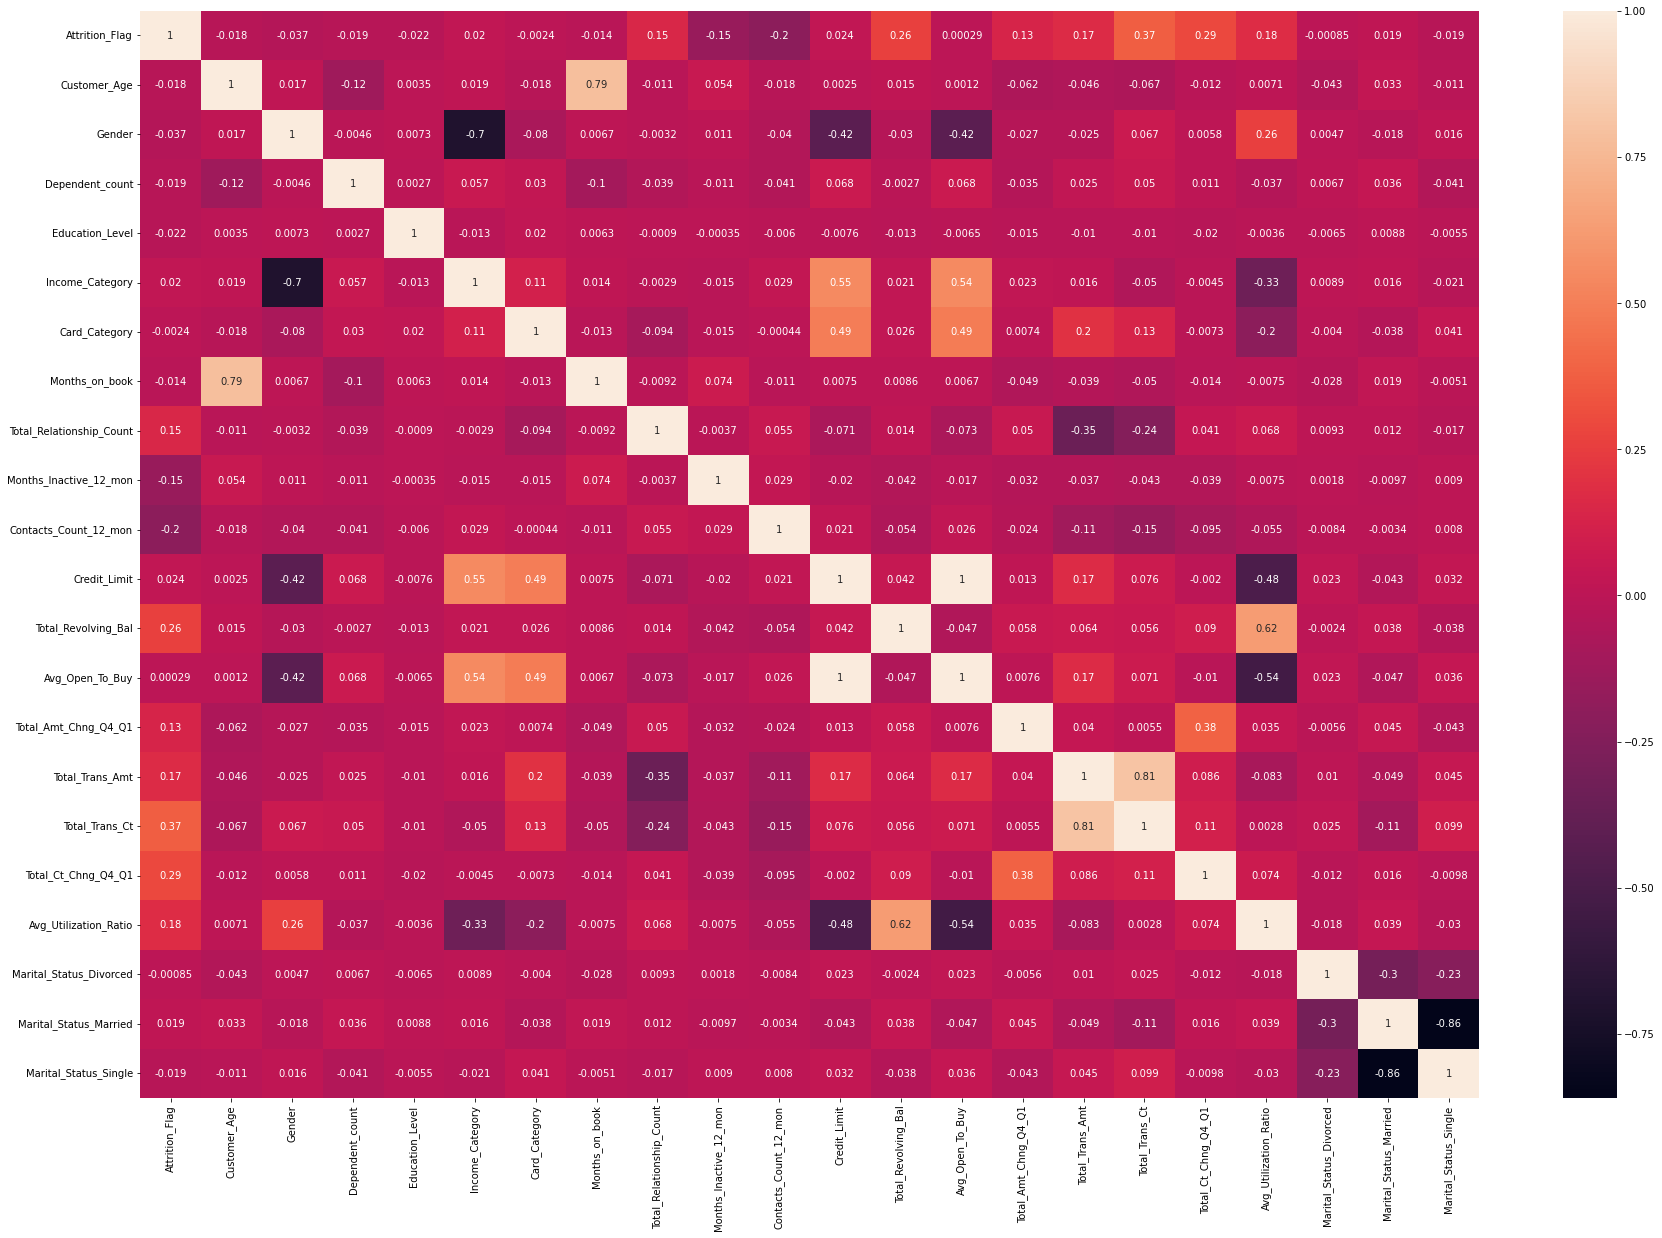

In [120]:
plt.figure(figsize = (30,20))
sns.heatmap(df_new.corr(), annot = True)
plt.savefig("pearson_corr.png")

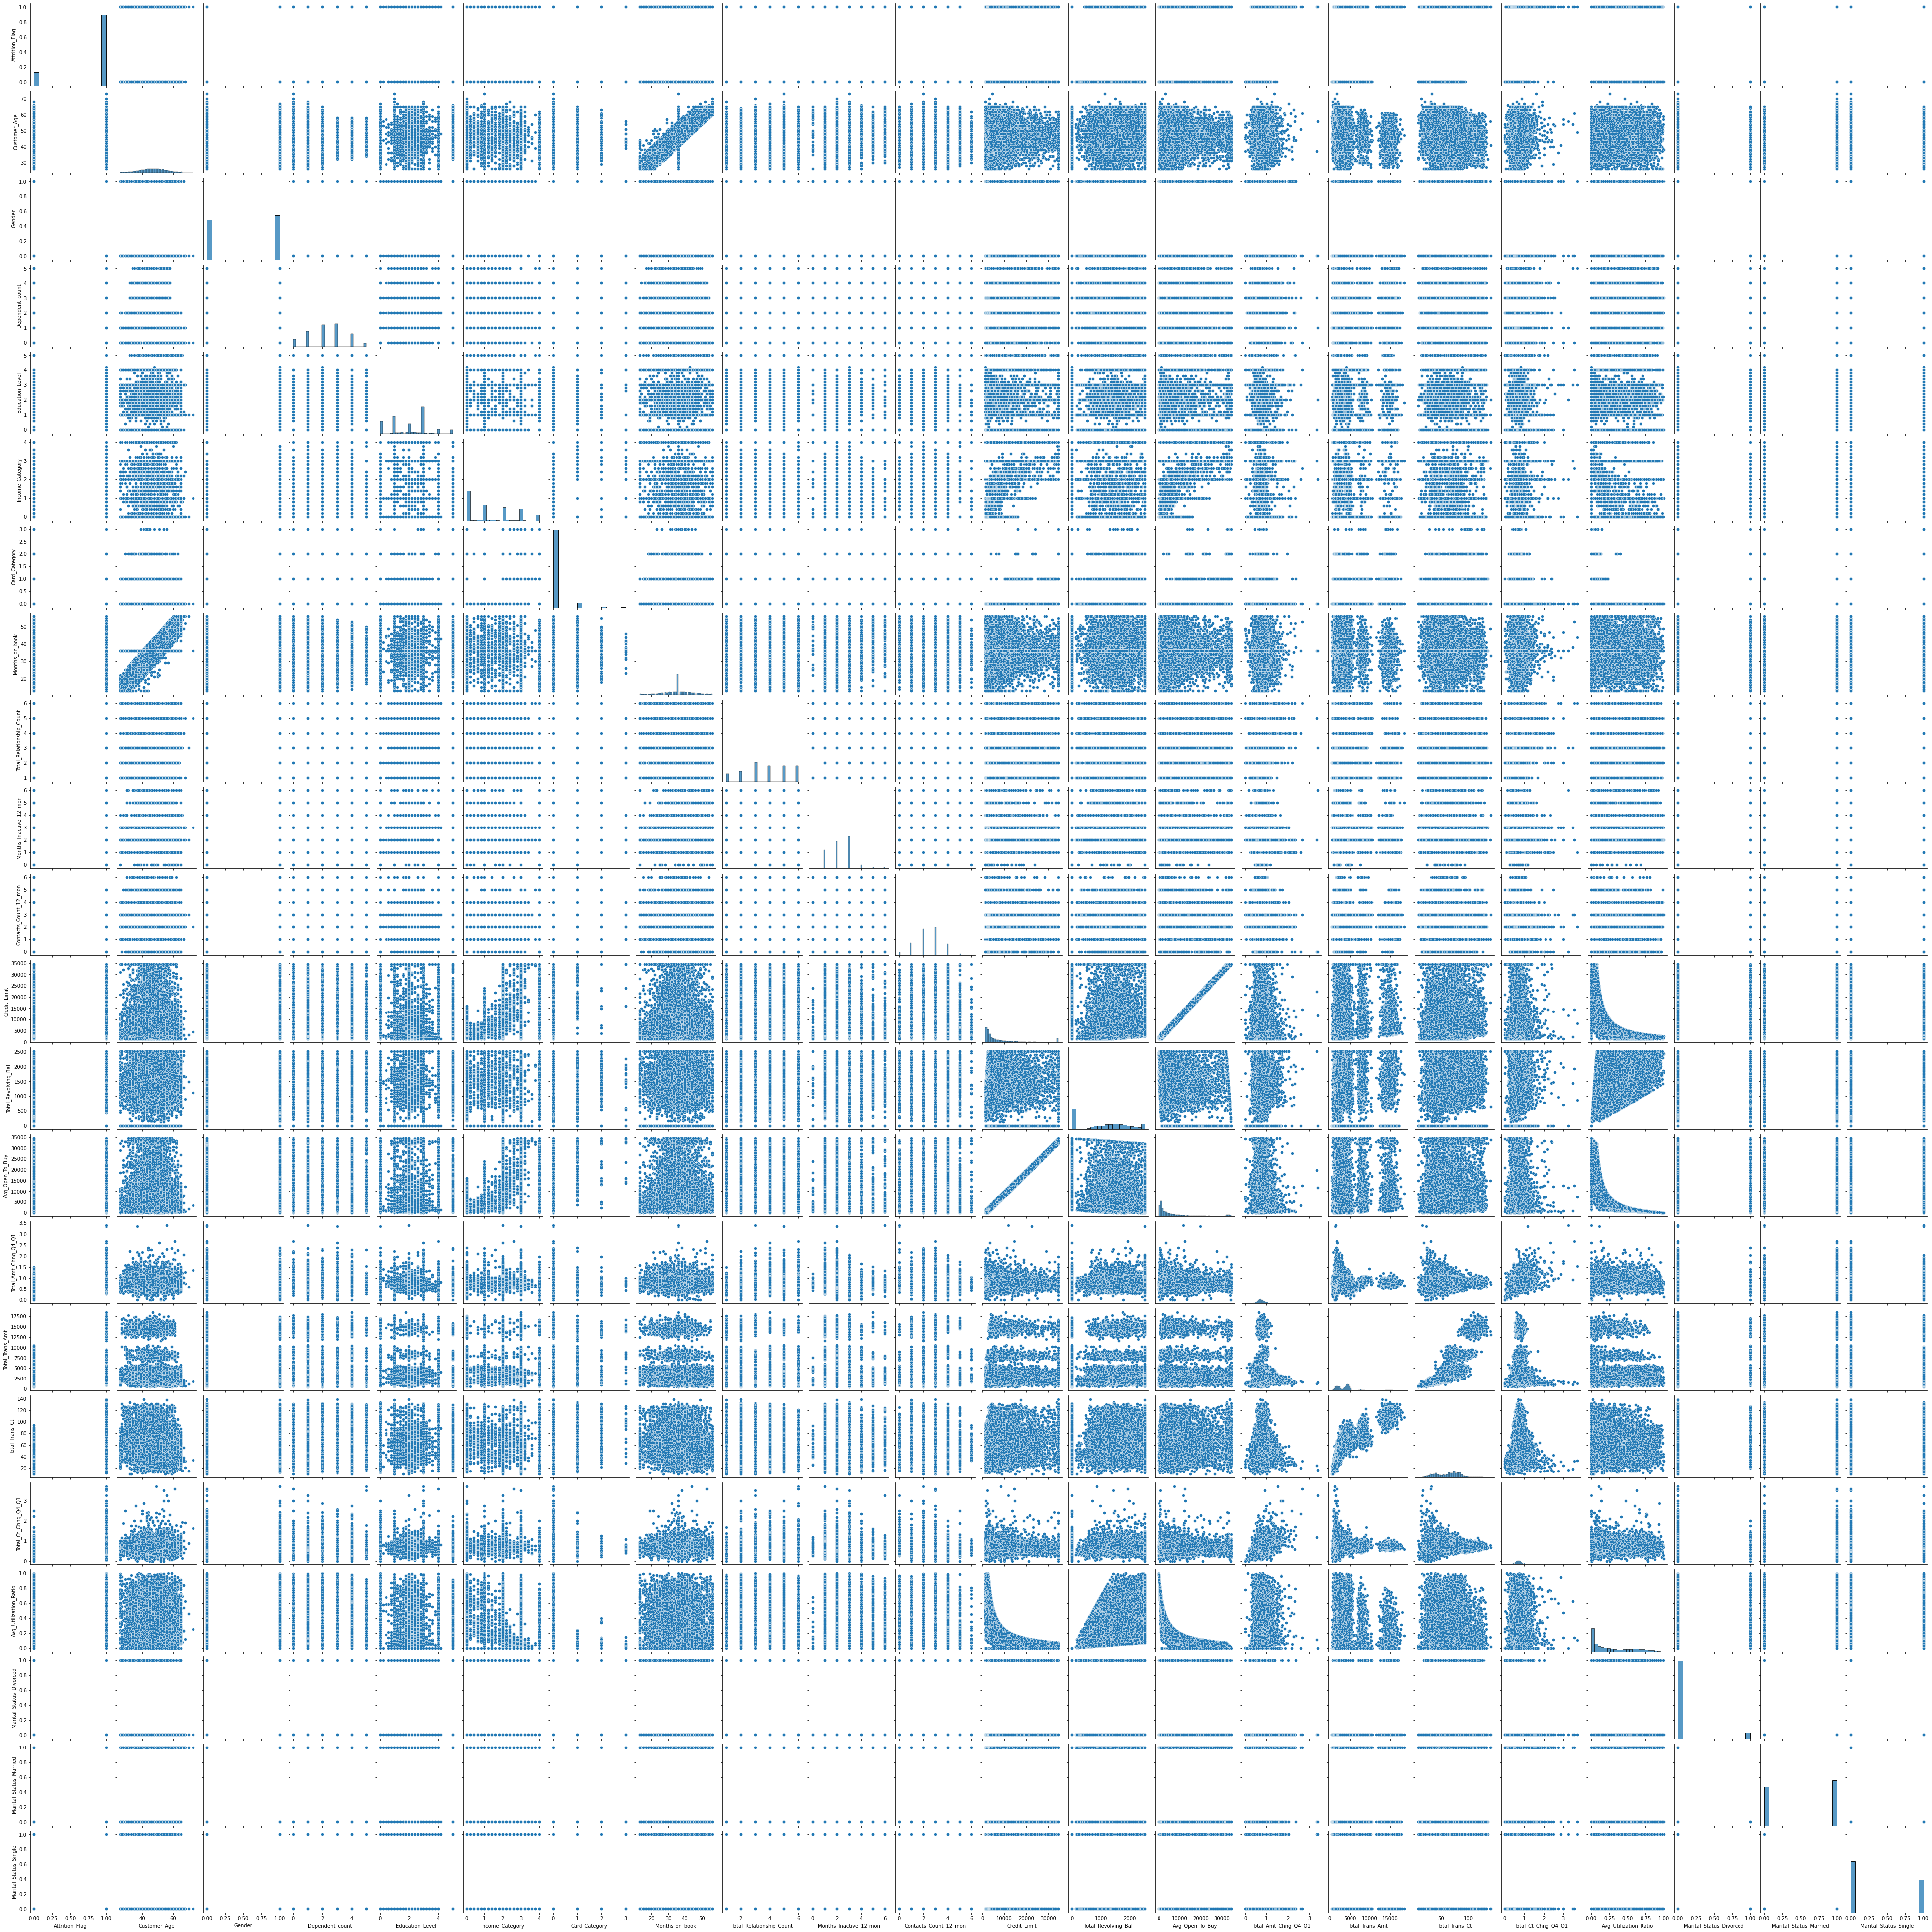

In [105]:
sns.pairplot(df_new)

# Model Training

## Train test split

In [107]:
x = df_new.drop("Attrition_Flag", axis = 1)
y = df_new["Attrition_Flag"]

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2, stratify = y)

In [114]:
x_train.shape

(7088, 21)

## Train Model By using Logistic regression

In [117]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [121]:
## teating Data Evaluation

y_pred = log_reg.predict(x_test)

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score : ", acc_score)
print("*"*70)

cnf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n", cnf_mat)

clf_rep = classification_report(y_test,y_pred)
print("Classification Report : \n",clf_rep)

Accuracy Score :  0.8706811451135242
**********************************************************************
Confusion Matrix :
 [[ 103  222]
 [  40 1661]]
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.72      0.32      0.44       325
         1.0       0.88      0.98      0.93      1701

    accuracy                           0.87      2026
   macro avg       0.80      0.65      0.68      2026
weighted avg       0.86      0.87      0.85      2026



In [122]:
## Training Data Evalution

y_pred_train = log_reg.predict(x_train)

acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score : ", acc_score)
print("*"*70)

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n", cnf_mat)

clf_rep = classification_report(y_train,y_pred_train)
print("Classification Report : \n",clf_rep)

Accuracy Score :  0.8758178002715714
**********************************************************************
Confusion Matrix :
 [[ 439  863]
 [ 143 6656]]
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.75      0.34      0.47      1302
         1.0       0.89      0.98      0.93      6799

    accuracy                           0.88      8101
   macro avg       0.82      0.66      0.70      8101
weighted avg       0.86      0.88      0.86      8101



## Model training By Decision Tree Algorithm

In [123]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [124]:
## Testing Data Evaluation

y_pred = dt_clf.predict(x_test)

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score : ", acc_score)
print("*"*70)

cnf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n", cnf_mat)

clf_rep = classification_report(y_test,y_pred)
print("Classification Report : \n",clf_rep)

Accuracy Score :  0.9378084896347483
**********************************************************************
Confusion Matrix :
 [[ 256   69]
 [  57 1644]]
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       325
         1.0       0.96      0.97      0.96      1701

    accuracy                           0.94      2026
   macro avg       0.89      0.88      0.88      2026
weighted avg       0.94      0.94      0.94      2026



In [125]:
## Training Data Evalution

y_pred_train = dt_clf.predict(x_train)

acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score : ", acc_score)
print("*"*70)

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n", cnf_mat)

clf_rep = classification_report(y_train,y_pred_train)
print("Classification Report : \n",clf_rep)

Accuracy Score :  1.0
**********************************************************************
Confusion Matrix :
 [[1302    0]
 [   0 6799]]
Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1302
         1.0       1.00      1.00      1.00      6799

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



# Model training By using Hyperparameter Tuning

In [128]:
dt_clf = DecisionTreeClassifier()
hyp = {"criterion":["gini","entropy"],
      "max_depth":np.arange(5,20),
      "min_samples_split":np.arange(3,10),
      "min_samples_leaf":np.arange(2,8)}
rscv = RandomizedSearchCV(dt_clf,hyp,cv = 5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9])})

In [130]:
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=7,
                       min_samples_split=8)

## Model Training

In [131]:
dt_hyp = rscv.best_estimator_
dt_hyp.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=7,
                       min_samples_split=8)

# Model Evalution

In [134]:
## Testing Data Evaluation

y_pred = dt_hyp.predict(x_test)

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score : ", acc_score)
print("*"*70)

cnf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n", cnf_mat)
print("*"*70)

clf_rep = classification_report(y_test,y_pred)
print("Classification Report : \n",clf_rep)
print("*"*70)

Accuracy Score :  0.947680157946693
**********************************************************************
Confusion Matrix :
 [[ 281   44]
 [  62 1639]]
**********************************************************************
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       325
         1.0       0.97      0.96      0.97      1701

    accuracy                           0.95      2026
   macro avg       0.90      0.91      0.90      2026
weighted avg       0.95      0.95      0.95      2026

**********************************************************************


In [135]:
## Training Data Evalution

y_pred_train = dt_hyp.predict(x_train)

acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score : ", acc_score)
print("*"*70)

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n", cnf_mat)
print("*"*70)

clf_rep = classification_report(y_train,y_pred_train)
print("Classification Report : \n",clf_rep)
print("*"*70)

Accuracy Score :  0.9728428589063078
**********************************************************************
Confusion Matrix :
 [[1201  101]
 [ 119 6680]]
**********************************************************************
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      1302
         1.0       0.99      0.98      0.98      6799

    accuracy                           0.97      8101
   macro avg       0.95      0.95      0.95      8101
weighted avg       0.97      0.97      0.97      8101

**********************************************************************


## Random Forest Algorithm

In [136]:
rf_clf = RandomForestClassifier(random_state =2)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

## Model Evalution

In [137]:
## Testing Data Evaluation

y_pred = rf_clf.predict(x_test)

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score : ", acc_score)
print("*"*70)

cnf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n", cnf_mat)
print("*"*70)

clf_rep = classification_report(y_test,y_pred)
print("Classification Report : \n",clf_rep)
print("*"*70)

Accuracy Score :  0.9664363277393879
**********************************************************************
Confusion Matrix :
 [[ 278   47]
 [  21 1680]]
**********************************************************************
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.86      0.89       325
         1.0       0.97      0.99      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.95      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026

**********************************************************************


In [138]:
## Training Data Evalution

y_pred_train = rf_clf.predict(x_train)

acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score : ", acc_score)
print("*"*70)

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n", cnf_mat)
print("*"*70)

clf_rep = classification_report(y_train,y_pred_train)
print("Classification Report : \n",clf_rep)
print("*"*70)

Accuracy Score :  1.0
**********************************************************************
Confusion Matrix :
 [[1302    0]
 [   0 6799]]
**********************************************************************
Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1302
         1.0       1.00      1.00      1.00      6799

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101

**********************************************************************


## Random Forest Hyperparameter Tuning

In [140]:
rf_clf = RandomForestClassifier()
hyp = {"n_estimators":np.arange(80,120),
      "criterion": ["gini","entropy"],
      "max_depth": np.arange(5,20),
      "min_samples_split":np.arange(3,10),
      "min_samples_leaf": np.arange(2,8)}

rscv = RandomizedSearchCV(rf_clf, hyp, cv= 5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119])})

In [141]:
rscv.best_estimator_

RandomForestClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=113)

# Model Training

In [142]:
rf_hyp = rscv.best_estimator_
rf_hyp.fit(x_train,y_train)

RandomForestClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=113)

## Model Evalution

In [143]:
## Testing Data Evaluation

y_pred = rf_hyp.predict(x_test)

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score : ", acc_score)
print("*"*70)

cnf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n", cnf_mat)
print("*"*70)

clf_rep = classification_report(y_test,y_pred)
print("Classification Report : \n",clf_rep)
print("*"*70)

Accuracy Score :  0.9644619940769991
**********************************************************************
Confusion Matrix :
 [[ 275   50]
 [  22 1679]]
**********************************************************************
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.85      0.88       325
         1.0       0.97      0.99      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026

**********************************************************************


In [144]:
## Training Data Evalution

y_pred_train = rf_hyp.predict(x_train)

acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score : ", acc_score)
print("*"*70)

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n", cnf_mat)
print("*"*70)

clf_rep = classification_report(y_train,y_pred_train)
print("Classification Report : \n",clf_rep)
print("*"*70)

Accuracy Score :  0.9967905196889273
**********************************************************************
Confusion Matrix :
 [[1281   21]
 [   5 6794]]
**********************************************************************
Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1302
         1.0       1.00      1.00      1.00      6799

    accuracy                           1.00      8101
   macro avg       1.00      0.99      0.99      8101
weighted avg       1.00      1.00      1.00      8101

**********************************************************************
